中文字体配置成功。
数据加载与清理成功。

正在计算各位置的伤害转化率...
  - TOP路 的平均伤害转化率为: 10.99 伤害/每金币
  - JUNGLE路 的平均伤害转化率为: 19.59 伤害/每金币
  - MID路 的平均伤害转化率为: 10.82 伤害/每金币
  - ADC路 的平均伤害转化率为: 10.06 伤害/每金币
  - SUPPORT路 的平均伤害转化率为: 2.95 伤害/每金币

正在生成可视化图表...


C:\Users\79926\AppData\Local\Temp\ipykernel_35068\1844518942.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=roi_series.index, y=roi_series.values, palette='viridis')



分析完毕！伤害转化率对比图已成功保存为 damage_roi_analysis.png

--- 各位置伤害转化效率最终排名 ---
JUNGLE     19.586900
TOP        10.988650
MID        10.815793
ADC        10.059158
SUPPORT     2.945038
dtype: float64


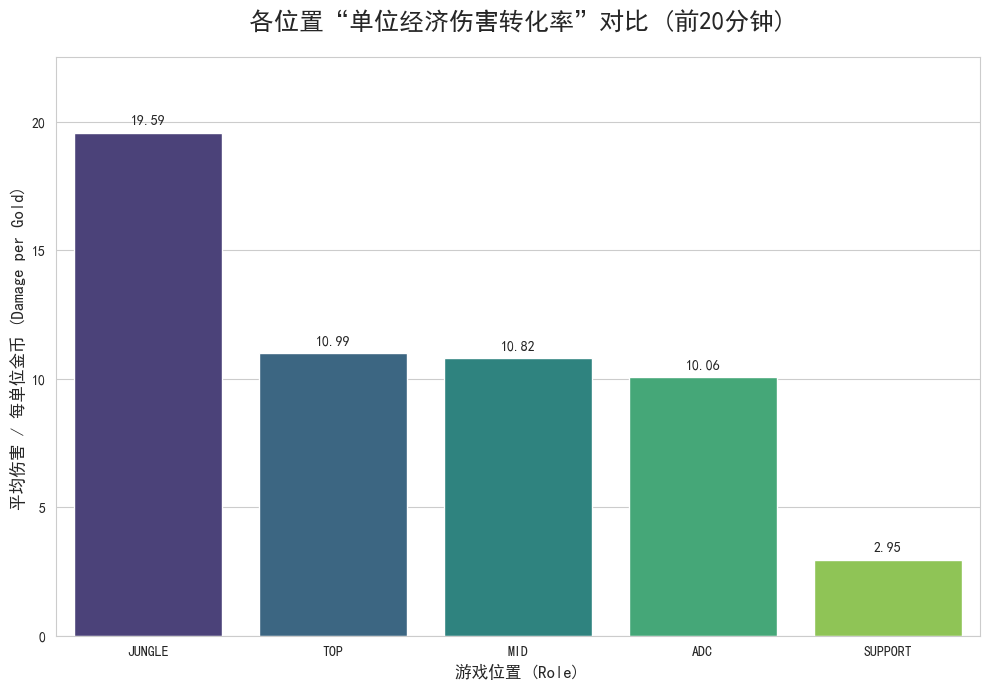

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- 步骤 1: 环境与数据准备 ---

# 设置绘图风格，让图表更好看
sns.set_style("whitegrid")

# 配置中文字体，我们提供一个备选列表来提高成功率
try:
    plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'KaiTi', 'FangSong']
    plt.rcParams['axes.unicode_minus'] = False
    print("中文字体配置成功。")
except Exception as e:
    print(f"字体配置失败，图表中的中文可能无法显示: {e}")

# 加载您的数据文件
try:
    df = pd.read_csv('14_data_EUW_Apex.csv')
    # 清理列名，去除可能存在的前后空格
    df.columns = df.columns.str.strip()
    print("数据加载与清理成功。")
except FileNotFoundError:
    print("错误：未在当前目录下找到 '14_data_EUW_Apex.csv' 文件。请确保文件路径正确。")
    # 如果文件不存在，则停止后续执行
    exit()


# --- 步骤 2: 计算各位置的“单位经济伤害转化率” (ROI) ---

# 定义五个游戏位置
roles = ['top', 'jungle', 'mid', 'adc', 'support']
roi_results = {}

print("\n正在计算各位置的伤害转化率...")

for role in roles:
    gold_col = f'{role}_gold_20'
    damage_col = f'{role}_damage_20'
    
    # 检查所需的列是否存在
    if gold_col not in df.columns or damage_col not in df.columns:
        print(f"错误：数据中缺少 {gold_col} 或 {damage_col} 列，无法为'{role}'位置计算ROI。")
        continue

    # 计算ROI。为防止除以0的错误，我们将金币为0的情况替换为NaN
    # NaN值在后续计算均值时会被自动忽略，这是最稳妥的处理方式
    roi_col = df[damage_col] / df[gold_col].replace(0, np.nan)
    
    # 计算每个位置ROI的平均值，并忽略计算中产生的任何NaN值
    avg_roi = roi_col.mean()
    
    # 将结果存入字典，并将role名转为大写以便显示
    roi_results[role.upper()] = avg_roi
    print(f"  - {role.upper()}路 的平均伤害转化率为: {avg_roi:.2f} 伤害/每金币")

# 将结果字典转换为Pandas Series，并按效率从高到低排序
roi_series = pd.Series(roi_results).sort_values(ascending=False)


# --- 步骤 3: 可视化与结果呈现 ---

print("\n正在生成可视化图表...")

# 创建一个大小合适的画布
plt.figure(figsize=(10, 7))

# 使用Seaborn绘制条形图，并使用一个视觉上吸引人的色板
barplot = sns.barplot(x=roi_series.index, y=roi_series.values, palette='viridis')

# 在每个条形的顶部添加具体的数值标签，方便阅读
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),      # 要显示的文本
                   (p.get_x() + p.get_width() / 2., p.get_height()), # 文本的位置
                   ha = 'center', va = 'center',       # 对齐方式
                   xytext = (0, 9),                      # 文本的偏移量
                   textcoords = 'offset points')

# 设置图表的标题和坐标轴标签，使其更具专业性
plt.title('各位置“单位经济伤害转化率”对比 (前20分钟)', fontsize=18, pad=20)
plt.xlabel('游戏位置 (Role)', fontsize=12)
plt.ylabel('平均伤害 / 每单位金币 (Damage per Gold)', fontsize=12)
plt.ylim(0, roi_series.max() * 1.15) # 自动提高Y轴上限，给数值标签留出空间

# 自动调整整体布局，防止标签被裁切
plt.tight_layout()

# 保存图表为高清图片
plt.savefig('damage_roi_analysis.png', dpi=300)

print("\n分析完毕！伤害转化率对比图已成功保存为 damage_roi_analysis.png")

# 在最后再次打印排序后的最终数值结果，方便您复制和参考
print("\n--- 各位置伤害转化效率最终排名 ---")
print(roi_series)

中文字体配置成功。
数据加载与准备完成。

数据标准化完成。
正在使用“手肘法”确定最佳聚类数量...


C:\Users\79926\AppData\Local\Temp\ipykernel_35068\1124903159.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\79926\AppData\Local\Temp\ipykernel_35068\1124903159.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis.dropna(inplace=True)


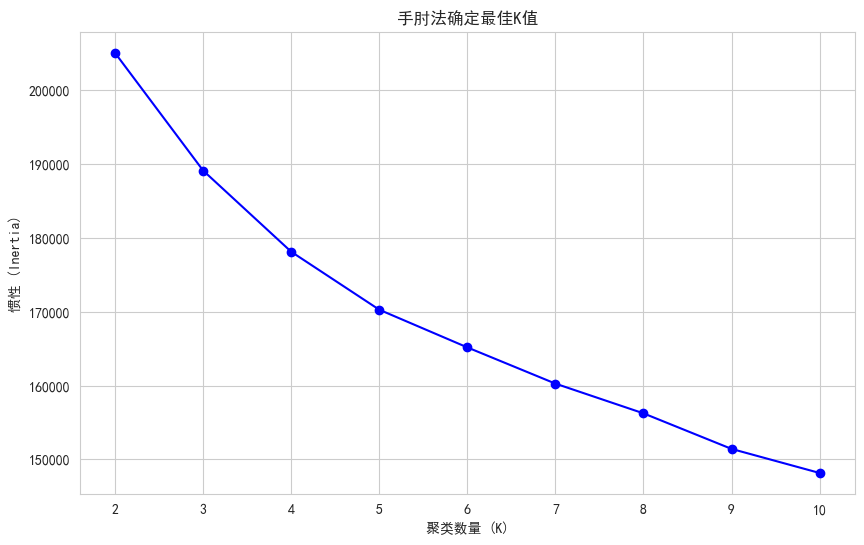

手肘图已生成。请观察图像，在“手肘”的拐点处，就是最佳的K值。我们通常选择3、4或5。

已选择 K=4，正在执行最终聚类...


C:\Users\79926\AppData\Local\Temp\ipykernel_35068\1124903159.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis['cluster'] = kmeans.fit_predict(X_scaled)


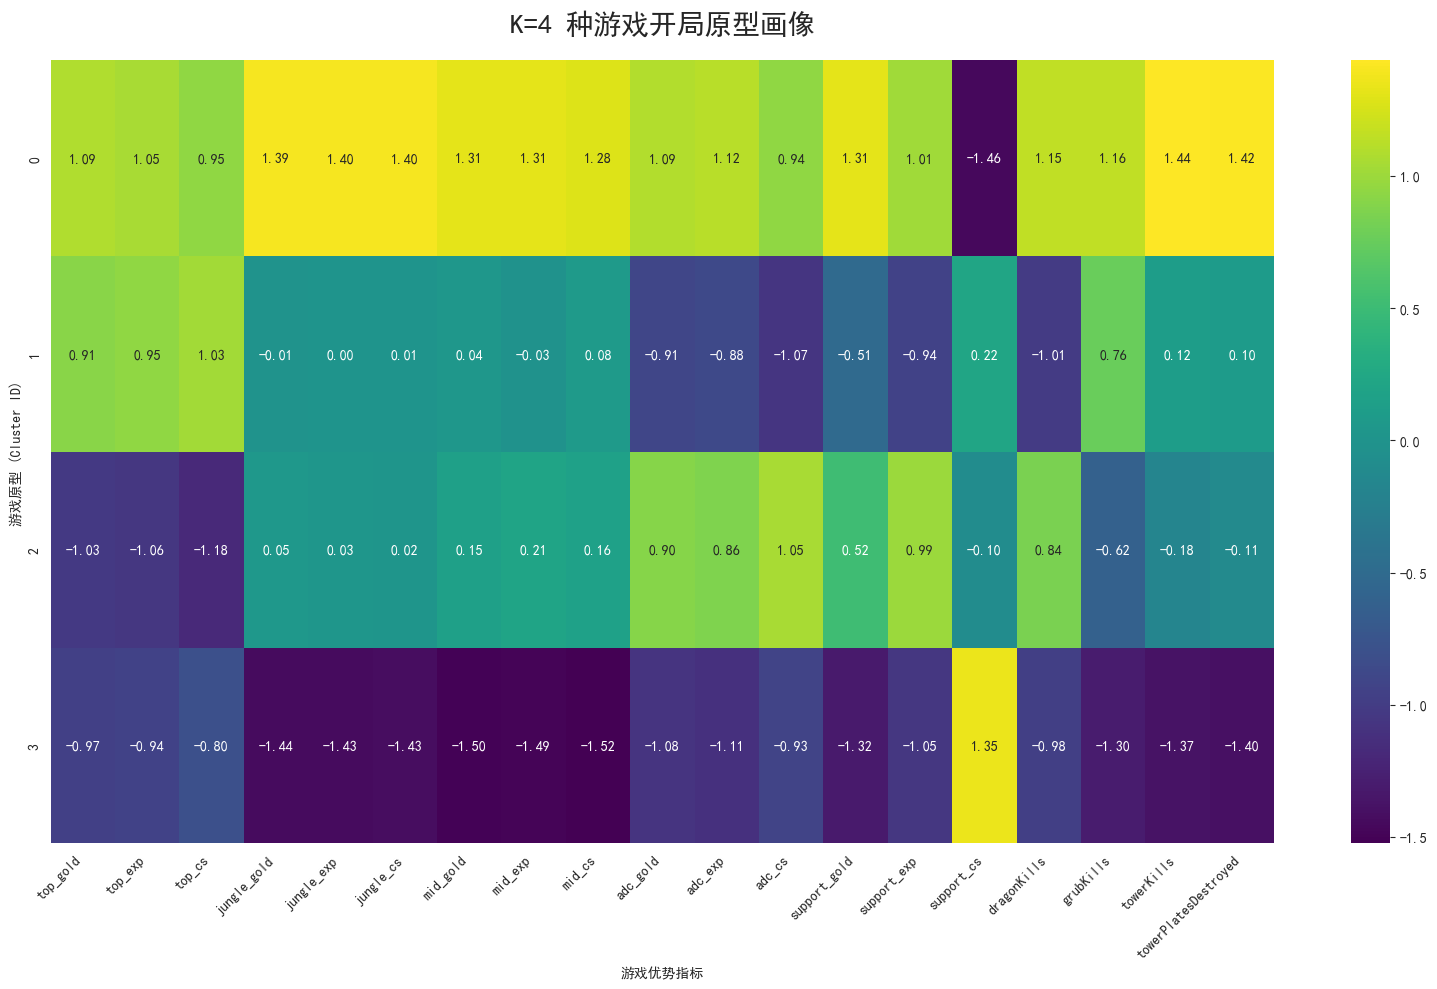


聚类分析完毕！各游戏原型的画像热力图已保存为 game_archetypes_heatmap.png

--- 各游戏原型占比 ---
cluster
0    0.204924
1    0.308135
2    0.280123
3    0.206818
Name: proportion, dtype: float64

--- 各游戏原型特征均值 ---
         top_gold_diff_14  top_exp_diff_14  top_cs_diff_14  \
cluster                                                      
0             1148.951868       870.165576       15.199461   
1              971.794366       788.076056       16.541357   
2             -954.608451      -854.805352      -19.325634   
3             -889.681419      -759.769935      -13.217093   

         jungle_gold_diff_14  jungle_exp_diff_14  jungle_cs_diff_14  \
cluster                                                               
0                 926.089719          874.375433          13.681941   
1                  61.619206           50.119078           0.764405   
2                  95.907887           66.436620           0.776620   
3                -822.503625         -800.665013         -12.694010   

         mid_go

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# --- 步骤 1: 环境与数据准备 ---

# 配置中文字体
try:
    plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'KaiTi', 'FangSong']
    plt.rcParams['axes.unicode_minus'] = False
    print("中文字体配置成功。")
except Exception as e:
    print(f"字体配置失败: {e}")

# 加载并准备数据
try:
    df = pd.read_csv('14_data_EUW_Apex.csv')
    df.columns = df.columns.str.strip()
    # 我们只分析team=1的数据，因为team=2的数据是完全镜像的，会造成数据污染
    df_team1 = df[df['team'] == 1].copy()
    diff_cols_14 = [col for col in df.columns if 'diff_14' in col]
    df_analysis = df_team1[diff_cols_14]
    # 清理数据中的无限值和NaN值
    df_analysis.replace([np.inf, -np.inf], np.nan, inplace=True)
    df_analysis.dropna(inplace=True)
    print("数据加载与准备完成。")
except FileNotFoundError:
    print("错误：未找到 '14_data_EUW_Apex.csv' 文件。")
    exit()

# --- 步骤 2: 数据标准化 ---

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_analysis)
print("\n数据标准化完成。")

# --- 步骤 3: 使用“手肘法”确定最佳聚类数量(K) ---

print("正在使用“手肘法”确定最佳聚类数量...")
inertia = []
K_range = range(2, 11) # 我们测试分为2类到10类的情况
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# 绘制手肘图
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('聚类数量 (K)')
plt.ylabel('惯性 (Inertia)')
plt.title('手肘法确定最佳K值')
plt.grid(True)
plt.savefig('elbow_method.png', dpi=300)
plt.show()
print("手肘图已生成。请观察图像，在“手肘”的拐点处，就是最佳的K值。我们通常选择3、4或5。")

# --- 步骤 4: 执行聚类并分析结果 ---

# ******** 请根据手肘图的结果，在这里手动设置K值 ********
OPTIMAL_K = 4 # 举例：我们根据观察，选择4作为最佳聚类数
# **********************************************************

print(f"\n已选择 K={OPTIMAL_K}，正在执行最终聚类...")
kmeans = KMeans(n_clusters=OPTIMAL_K, random_state=42, n_init='auto')
df_analysis['cluster'] = kmeans.fit_predict(X_scaled)

# 计算每个聚类的特征均值，来描绘“画像”
cluster_profiles = df_analysis.groupby('cluster').mean()

# 为了方便对比，我们再次对结果进行标准化处理后可视化
profile_scaled = scaler.fit_transform(cluster_profiles)
profile_scaled_df = pd.DataFrame(profile_scaled, 
                                 columns=cluster_profiles.columns, 
                                 index=cluster_profiles.index)

# --- 步骤 5: 可视化聚类画像 ---

plt.figure(figsize=(16, 10))
# 为了让标签更简洁，我们去掉列名中重复的 "_diff_14" 部分
clean_labels = [col.replace('_diff_14', '') for col in profile_scaled_df.columns]
profile_scaled_df.columns = clean_labels

sns.heatmap(profile_scaled_df, cmap='viridis', annot=True, fmt='.2f')
plt.title(f'K={OPTIMAL_K} 种游戏开局原型画像', fontsize=20, pad=20)
plt.xlabel('游戏优势指标')
plt.ylabel('游戏原型 (Cluster ID)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('game_archetypes_heatmap.png', dpi=300)
plt.show()

print("\n聚类分析完毕！各游戏原型的画像热力图已保存为 game_archetypes_heatmap.png")

# 打印每个类别的占比
print("\n--- 各游戏原型占比 ---")
print(df_analysis['cluster'].value_counts(normalize=True).sort_index())

# 打印每个类别的具体特征值（原始均值）
print("\n--- 各游戏原型特征均值 ---")
print(cluster_profiles)